# Chapter 6 Sustainabilty and Engineering: Windown Transmittance

1. [Introduction: Window Transmittance](#1.-Introduction)
2. [Simulation: Window Transmittance](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment)

## 1. Introduction

```{figure} GlassTransmittance_Image.png
:alt: Descriptive alt text for accessibility
:width: 600px
:name: Glass Transmittance 

**Figure 6.8 **: Glass Transmittance

```

### Window Transmittance Analysis: Theoretical Overview

### 1. Solar Heat Gain Coefficient (SHGC)
**Definition**:  
The Solar Heat Gain Coefficient (SHGC) is the fraction of incident solar radiation that passes through a window and contributes to indoor heat gain.

**Range**:  
- SHGC values range from 0 to 1.  
- A higher SHGC means more solar heat enters the building.

**Application**:  
Used to calculate **heat transmitted** through the window:

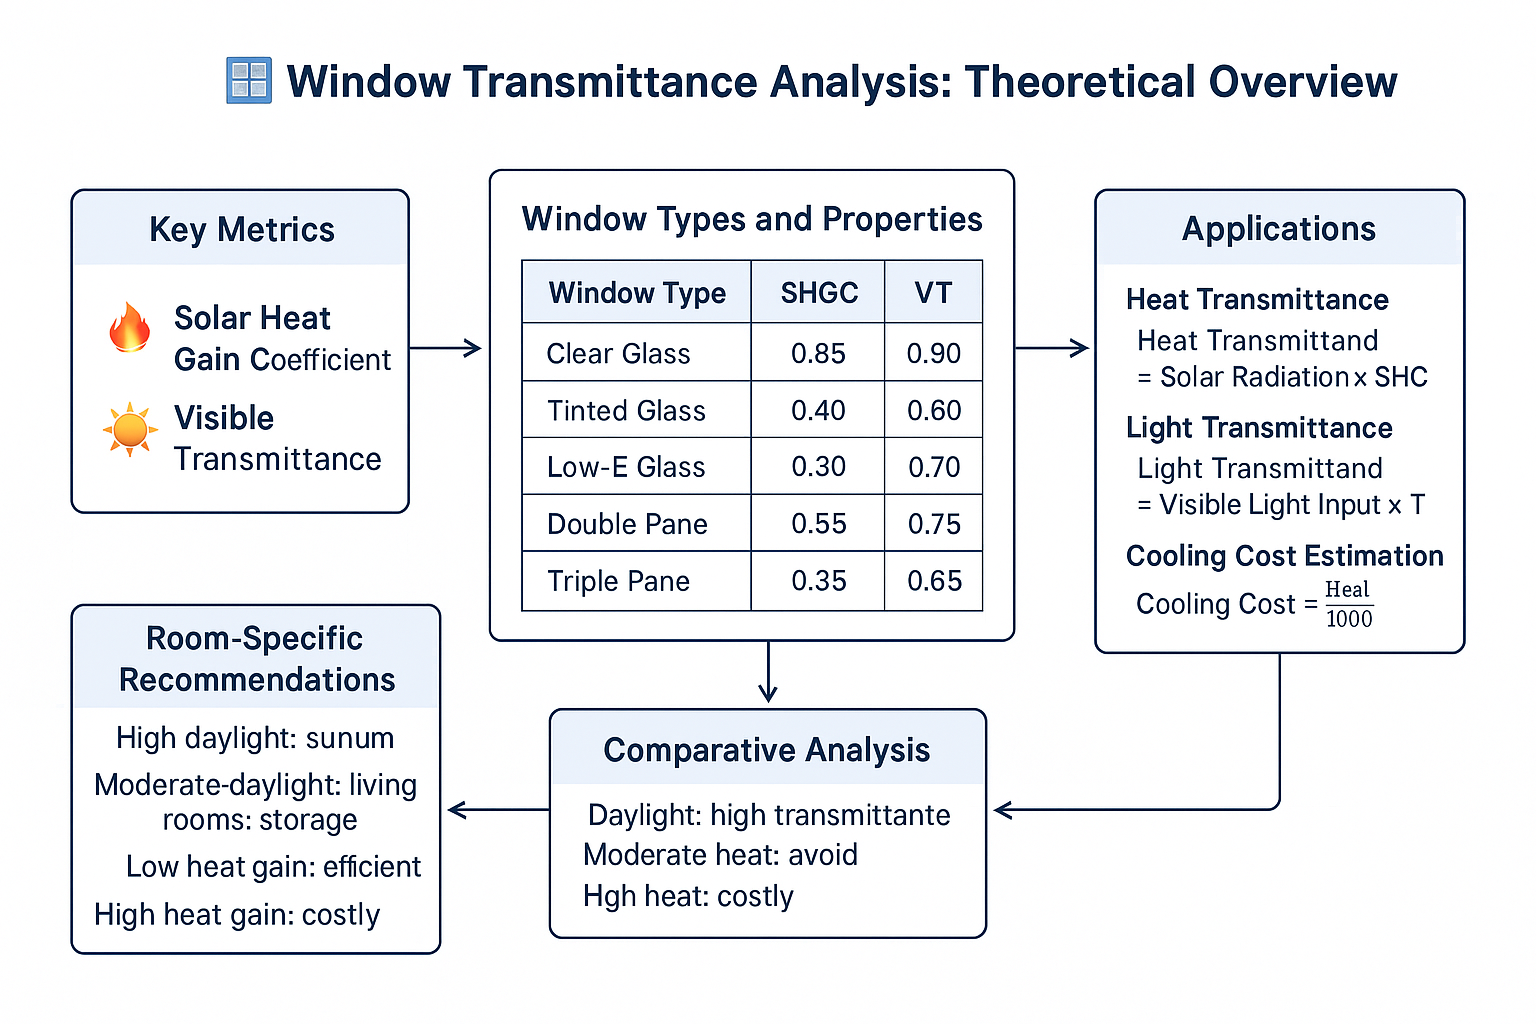


---

### 2. Visible Transmittance (VT)
**Definition**:  
Visible Transmittance (VT) is the fraction of visible light that passes through a window.

**Range**:  
- VT values range from 0 to 1.  
- A higher VT means more daylight enters the space.

**Application**:  
Used to calculate **light transmitted** through the window:


---

### 3. Cooling Cost Estimation
**Objective**:  
Estimate the energy cost associated with cooling the indoor space due to solar heat gain.

**Assumptions**:
- 1 W/m² over 1 hour ≈ 0.001 kWh/m²  
- Cooling cost rate = $0.12 per kWh

**Formula**:


---

### 4. Room-Specific Recommendations
**Based on Light Transmittance**:
- **>600 lumens/m²** → Ideal for sunrooms, studios, or high daylight spaces  
- **400–600 lumens/m²** → Suitable for living rooms, kitchens, or general use  
- **<400 lumens/m²** → Best for bedrooms, storage, or low-light areas

**Based on Heat Transmittance**:
- **<300 W/m²** → Energy-efficient, minimal cooling load  
- **300–500 W/m²** → Moderate heat gain, may need shading  
- **>500 W/m²** → High heat gain, increased cooling costs

---

### 5. Comparative Analysis
The calculator compares all window types under the same input conditions to help users select the most efficient option for their climate and room type.

**Output Table Includes**:
- Window type  
- Heat transmitted (W/m²)  
- Light transmitted (lumens/m²)

---

### 🔍 Summary
This method provides a simplified yet effective way to evaluate window performance in terms of:
- Thermal comfort  
- Daylight availability  
- Energy cost implications  

It supports informed decision-making for residential window selection based on climate, orientation, and room function.

## 2. Simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

# 📋 Window types and properties
window_types = {
    "Clear Glass": {"SHGC": 0.85, "VT": 0.90},
    "Tinted Glass": {"SHGC": 0.40, "VT": 0.60},
    "Low-E Glass": {"SHGC": 0.30, "VT": 0.70},
    "Double Pane": {"SHGC": 0.55, "VT": 0.75},
    "Triple Pane": {"SHGC": 0.35, "VT": 0.65}
}

# ⚙️ Constants
cooling_cost_per_kwh = 0.12  # USD per kWh

# 📊 Interactive function
def transmittance_calculator(window, solar, visible):
    data = window_types[window]
    heat = solar * data["SHGC"]
    light = visible * data["VT"]
    cost = (heat / 1000) * cooling_cost_per_kwh

    print(f"\n🔍 Results for {window}:")
    print(f"🔆 Heat Transmitted: {heat:.2f} W/m²")
    print(f"💡 Light Transmitted: {light:.2f} lumens/m²")
    print(f"💰 Cooling Cost (1 hr): ${cost:.2f}/m²")

    # 🧠 Interpretation
    interpretation = []
    interpretation.append("📘 Interpretation:")
    if heat < 300:
        interpretation.append("✅ Low heat gain — good for cooling efficiency.")
    elif heat < 500:
        interpretation.append("⚠️ Moderate heat gain — may require shading.")
    else:
        interpretation.append("❌ High heat gain — could increase cooling costs.")

    if light > 600:
        interpretation.append("✅ High daylight — ideal for sunrooms or studios.")
    elif light > 400:
        interpretation.append("⚠️ Moderate daylight — suitable for living rooms.")
    else:
        interpretation.append("❌ Low daylight — better for bedrooms or storage.")

    print("\n" + "\n".join(interpretation))

    # 📊 Comparison table
    print("\n📊 Comparison of All Window Types:")
    print(f"{'Window':<15} {'Heat (W/m²)':>15} {'Light (lumens/m²)':>25}")
    print("-" * 55)
    for name, props in window_types.items():
        h = solar * props["SHGC"]
        l = visible * props["VT"]
        print(f"{name:<15} {h:>15.2f} {l:>25.2f}")

# 🧪 UI sliders and dropdown
interact(
    transmittance_calculator,
    window=Dropdown(options=list(window_types.keys()), description="Window Type"),
    solar=FloatSlider(value=800, min=100, max=1200, step=50, description="Solar (W/m²)"),
    visible=FloatSlider(value=750, min=100, max=1200, step=50, description="Visible (lumens/m²)")
)


interactive(children=(Dropdown(description='Window Type', options=('Clear Glass', 'Tinted Glass', 'Low-E Glass…

<function __main__.transmittance_calculator(window, solar, visible)>

## 3. Self-Assessment


### 📘 Conceptual Questions

These questions explore the physical principles and modeling logic behind the calculator.

### Solar Heat Gain Coefficient (SHGC)
- What does the SHGC represent in terms of energy transmission through windows?
- How does SHGC affect indoor temperature and cooling load?
- Why is SHGC multiplied by solar radiation to estimate transmitted heat?

### Visible Transmittance (VT)
- What does VT measure in the context of window performance?
- How does VT influence natural lighting and visual comfort?
- Why might a window with high VT be desirable in certain rooms but not others?

### Energy Cost Estimation
- How is the cooling cost estimated from transmitted heat?
- What assumptions are made about energy pricing and cooling duration?
- Why is the heat value converted to kilowatt-hours before calculating cost?

---

### 🔍 Reflective Questions

These questions encourage critical thinking and application to real-world building design.

- Which window type would you choose for a sunroom in a hot climate, and why?
- How would the results change if the solar radiation input were based on seasonal averages?
- What trade-offs exist between maximizing daylight and minimizing heat gain?
- How could this model be extended to include window orientation or shading devices?
- How might energy cost estimates vary across regions with different electricity rates?


### ❓ Quiz Questions

### Multiple Choice

1. **Which window type has the highest SHGC value?**  
   A. Tinted Glass  
   B. Low-E Glass  
   C. Clear Glass  
   D. Triple Pane  
   **Answer:** C

2. **If solar radiation is 800 W/m² and SHGC is 0.40, what is the transmitted heat?**  
   A. 320 W/m²  
   B. 400 W/m²  
   C. 480 W/m²  
   D. 640 W/m²  
   **Answer:** A

3. **Which factor most directly affects the amount of daylight entering a room?**  
   A. SHGC  
   B. Cooling cost  
   C. VT  
   D. Solar radiation  
   **Answer:** C

### True/False

4. **A window with low SHGC and high VT is ideal for reducing cooling costs while maintaining daylight.**  
   **Answer:** True

5. **The calculator assumes a constant cooling cost per kilowatt-hour.**  
   **Answer:** True

6. **Visible transmittance affects the thermal load of a building.**  
   **Answer:** False

### Short Answer

7. **Explain why a window with high SHGC might be problematic in a warm climate.**  
   *Answer:* It allows more solar heat to enter, increasing indoor temperatures and cooling demand.

8. **What physical factors might cause actual heat gain to differ from the model’s estimate?**  
   *Answer:* Window orientation, shading, frame material, and air leakage can all influence real-world performance.
